# Working with U.S. Census Data in Python Using `censusdis`

## Background, History, and Upcoming Events

<table>
    <tr>
        <td rowspan="3" width="240">
            <a href="https://www.communitycoalitiononrace.org/" target="_blank">
              <img src="./images/communitycoalitiononrace_logo.png" alt="Community Coalition on Race Logo" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2020</td>
        <td style="font-size:16pt">
            CCR migrated from CD-ROM and spreadsheet census data to the US. Census API using 
            the <a href="https://github.com/jtleider/censusdata">censusdata</a> Python package
            and some internal interface code.
        </td>
    </tr>
    <tr>
        <td style="font-size:24pt">2021</td>
        <td style="font-size:16pt">
            Developed <a href="https://github.com/vengroff/divintseg">divintseg</a>, Python
            package for computing diversity, integration, and segregation metrics.
        </td>
    </tr>
    <tr>
        <td style="font-size:24pt">2022</td>
        <td style="font-size:16pt">
            Censusdata support ended. We rewrote CCR's internal interface as the open source <a href="https://github.com/vengroff/censusdis">censusdis</a> package to load data and compute dis metrics. We added mapping and other utilities to make it a one stop shop.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://www.twosigma.com/" target="_blank">
                <img src="./images/ts-logo.svg" alt="Two Sigma Logo" width="200"/>
            </a>
            <br/>
            <a href="https://www.twosigma.com/data-clinic/" target="_blank">
                <img src="./images/logo-ts-data-clinic.png" alt="TS Data Clinic Logo" width="200"/>
            </a>
            <br/>
            <a href="https://housingnavigatorma.org/" target="_blank">
                <img src="./images/housing-nav-logo.svg" alt="mybinder.org" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2022-2023</td>
        <td style="font-size:16pt">
            Used censusdis along with proprietary data to analyze affordable
            housing availability and need in Massachusetts.
        </td>
    </tr>
    <tr>
        <td style="text-align: center;">
            <a href="https://datapinions.com/" target="_blank">
                <img src="https://datapinions.com/wp-content/uploads/2023/02/cropped-favicon512.png" alt="Datapinions" width="100"/>
            </a>
        </td>
        <td style="font-size:24pt">2022-2023</td>
        <td style="font-size:16pt">
            <a href="http://di-map.datapinions.com/">http://di-map.datapinions.com/</a>.
            A nationwide interactive map of diversity and integration built with censusdis.
        </td>
    </tr>
    <tr>
        <td style="text-align: center;">
            <a href="https://pydata.org/seattle2023/" target="_blank">
                <img src="https://pydata.org/seattle2023/wp-content/uploads/2022/10/PyData_logo.png" alt="Datapinions" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2023</td>
        <td style="font-size:16pt">
            PyData Seattle tutorial introduces `censusdis` to the world.
        </td>
    </tr>
    <tr>
        <td>
        </td>
        <td style="font-size:24pt">2024</td>
        <td style="font-size:16pt">
            Version 1.0.0 of `censusdis` released.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://facctconference.org/2024/" target="_blank">
                <img src="./images/facct2024logo.png" alt="ACM FAccT 2024 Logo" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">June, 2024</td>
        <td style="font-size:16pt">
            Impact charts paper at ACM FAccT 2024.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://www.scipy2024.scipy.org/" target="_blank">
                <img src="./images/SCIPY-2024.png" alt="SciPy 2024 Logo" width="140"/>
            </a>
        </td>
        <td style="font-size:24pt">July, 2024</td>
        <td style="font-size:16pt">
            Half-day tutorial at SciPy 2024.
        </td>
    </tr>
</table>
    

# Outline

  - ## "Hello, World"
    - ### `ced.download`
    - ### Data Set, Vintage, Variables
    - ### Geography Basics
  - ## Additional Geographies
    - ### On-Spine Geographies
    - ### Off-Spine Geographies
    - ### The Power of `contained_within` 
  - ## The U.S. Census Data Model in Detail
    - ### Data Sets and Vintages
    - ### Groups
    - ### Variables 


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# "Hello, World"

We will query
 - the **American Community Survey 5-Year Data** (*data set*)
 - **2020** (*vintage*) 
 - for **median household income** (*variable*)
 - in **New Jersey** (*geography*).
 
Using
 - [`censusdis.data.download`](https://censusdis.readthedocs.io/en/latest/data.html#censusdis.data.download),
the workhorse API of censusdis

In [1]:
import censusdis.data as ced
from censusdis.datasets import ACS5
import censusdis.states as states

# The name of the variable that represents 
# median rent in the ACS 5-year data set.
VARIABLE_MEDIAN_RENT = 'B25064_001E'

df_md_median_rent = ced.download(
    
    # Data set: American Community Survey 5-Year
    dataset=ACS5,
    
    # Vintage: 2022
    vintage=2022, 
    
    # Variable: median rent.
    download_variables=VARIABLE_MEDIAN_RENT, 
    
    # Geography: Maryland
    state=states.MD
)

df_md_median_rent

,STATE,B25064_001E
0,24,1598


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Interpreting the Results

We asked for data from a single geography, New Jersey, so the return value is a data frame with only one row.

The data frame has two columns:
 - `STATE`, the [FIPS code](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) for Maryland. This is also the value of `censusdis.states.MD`.
 - `B25064_001E`, the value of variable we asked for, which is an estimate of median rent<sup>*</sup>.
 
So, according to this data, the median rent in Maryland is $1,598.
 
<sup>*</sup>How did we know that that variable was? More on that to come...

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extending Hello World: More than One State

We don't have to limit our queries to just a single geography.

We can query several states at once.

In [2]:
import censusdis.states as states

df_dmv_median_rent = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=VARIABLE_MEDIAN_RENT, 
    
    # Three "states" this time.
    state=[states.MD, states.VA, states.DC]  
)

df_dmv_median_rent

,STATE,B25064_001E
0,11,1817
1,24,1598
2,51,1440


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extension: More than One Variable

We can also query several variables at once.

We'll add the variable `NAME` to our query so it is easier for those of us who don't dream in FIPS codes to know what state each row represents.

In [3]:
df_dmv_median_rent = ced.download(
    dataset=ACS5,
    vintage=2022,
    
    # Name and median household income
    download_variables=['NAME', VARIABLE_MEDIAN_RENT],  
    
    state=[states.MD, states.VA, states.DC]  
)

df_dmv_median_rent

,STATE,NAME,B25064_001E
0,11,District of Columbia,1817
1,24,Maryland,1598
2,51,Virginia,1440


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extension: All the states

We can use `'*'` as a wildcard to get all known geographies of a given
type.

In [4]:
df_all_states_median_rent = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_RENT], 
    
    # Wild card for all the states
    state='*'
)

df_all_states_median_rent

,STATE,NAME,B25064_001E
0,01,Alabama,925
1,02,Alaska,1345
2,04,Arizona,1308
3,05,Arkansas,868
4,06,California,1856
5,08,Colorado,1594
6,09,Connecticut,1374
7,10,Delaware,1286
8,11,District of Columbia,1817
9,12,Florida,1444


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## The results of our queries are ordinary pandas [DataFrames](https://pandas.pydata.org/docs/reference/frame.html)

So we can do whatever analysis we might normally do with a data frame.
For example, what are the ten states with the highest median rent?

In [5]:
df_all_states_median_rent.nlargest(10, VARIABLE_MEDIAN_RENT)

,STATE,NAME,B25064_001E
11,15,Hawaii,1868
4,06,California,1856
8,11,District of Columbia,1817
20,24,Maryland,1598
5,08,Colorado,1594
47,53,Washington,1592
21,25,Massachusetts,1588
30,34,New Jersey,1577
32,36,New York,1507
9,12,Florida,1444


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

Or the ten states with the lowest median rent?

In [6]:
df_all_states_median_rent.nsmallest(10, VARIABLE_MEDIAN_RENT)

,STATE,NAME,B25064_001E
51,72,Puerto Rico,545
48,54,West Virginia,831
3,05,Arkansas,868
41,46,South Dakota,878
24,28,Mississippi,896
17,21,Kentucky,902
34,38,North Dakota,912
15,19,Iowa,914
0,01,Alabama,925
50,56,Wyoming,933


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query Geometry along with Data

Often, we'd like to plot our data on a map. So we need to know what each state looks like and where it is.
We can add `with_geometry=True` to our query to get what we need.

- The return value is now a `geopandas.GeoDataFrame`
- This is an extension of a `pandas.DataFrame` that adds `geometry` to each row.

In [7]:
gdf_all_states_median_rent = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=['NAME', VARIABLE_MEDIAN_RENT], 
    
    state='*',
    
    # We want the geometry of the states too:
    with_geometry=True
)

gdf_all_states_median_rent.head()

,STATE,NAME,B25064_001E,geometry
0,42,Pennsylvania,958,"POLYGON ((-80.51989 40.90666, -80.51963 40.911..."
1,06,California,1586,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
2,54,West Virginia,732,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
3,49,Utah,1090,"POLYGON ((-114.05296 37.59278, -114.05247 37.6..."
4,36,New York,1315,"MULTIPOLYGON (((-79.76215 42.24305, -79.76196 ..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the Results on a Map

- `cem.plot_us` 
  - Conveniently projects the United States
  - Relocates AK, HI, and PR for a more compact display

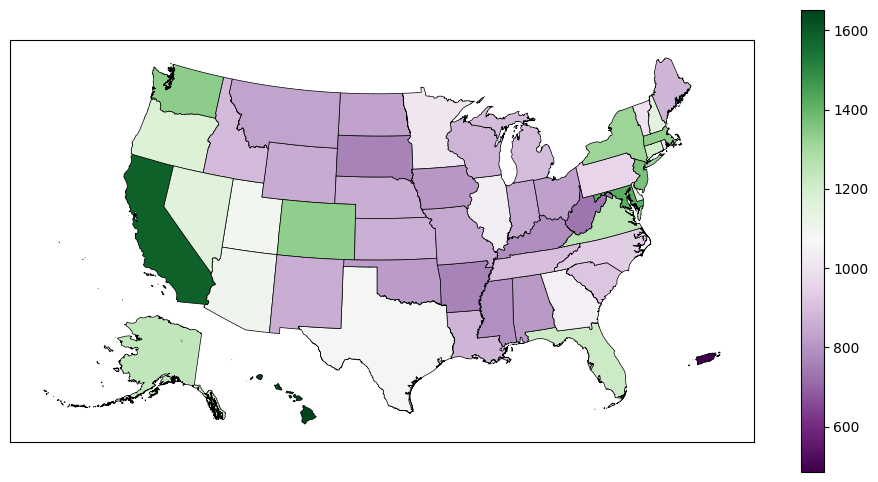

In [8]:
import censusdis.maps as cem

ax = cem.plot_us(
    gdf_all_states_median_rent,
    VARIABLE_MEDIAN_RENT,
    
    # The **kwargs here are standard Matplotlib **kwargs
    cmap="PRGn",
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    figsize=(12, 6)
)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Additional Geographies

## On-Spine Geography

- Levels of geography that are nested within one another.
- Lower levels are fully contained in higher levels.
- Lower levels completely cover higher levels.
- Levels are:
  - Nation (US)
  - Region
  - Division
  - State
  - County
  - Census Tract
  - Block Group
  - Block

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### The United States

In [9]:
from censusdis.datasets import DECENNIAL_PUBLIC_LAW_94_171

VARIABLE_TOTAL_POPULATION = "P1_001N"

In [10]:
gdf_us = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],
    
    # The entire nation.
    us="*",
    
    with_geometry=True  
)

In [11]:
gdf_us

,US,NAME,P1_001N,geometry
0,1,United States,331449281,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."


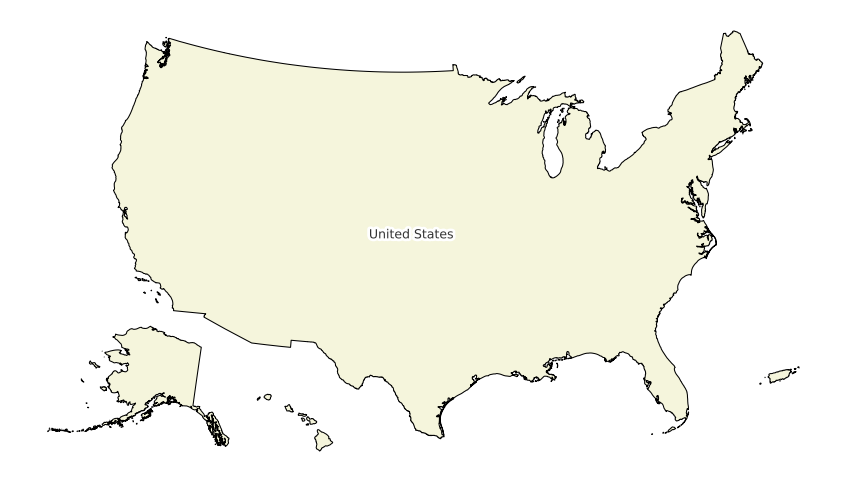

In [12]:
ax = cem.plot_us(
    gdf_us.clip((-180, 0, -65, 80)), # Clip off some outlying territories.
    linewidth=0.75, 
    geo_label=gdf_us["NAME"],
    color='beige', 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### All Regions

In [13]:
gdf_regions = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],
    
    # All the regions (there are only four)
    region="*",
    
    with_geometry=True  
)

In [14]:
gdf_regions

,REGION,NAME,P1_001N,geometry
0,2,Midwest Region,68985454,"MULTIPOLYGON (((-82.73447 41.60351, -82.72425 ..."
1,3,South Region,126266107,"MULTIPOLYGON (((-75.56752 39.51020, -75.56477 ..."
2,4,West Region,78588572,"MULTIPOLYGON (((-135.49189 57.09997, -135.4885..."
3,1,Northeast Region,57609148,"MULTIPOLYGON (((-70.89841 42.34027, -70.89721 ..."


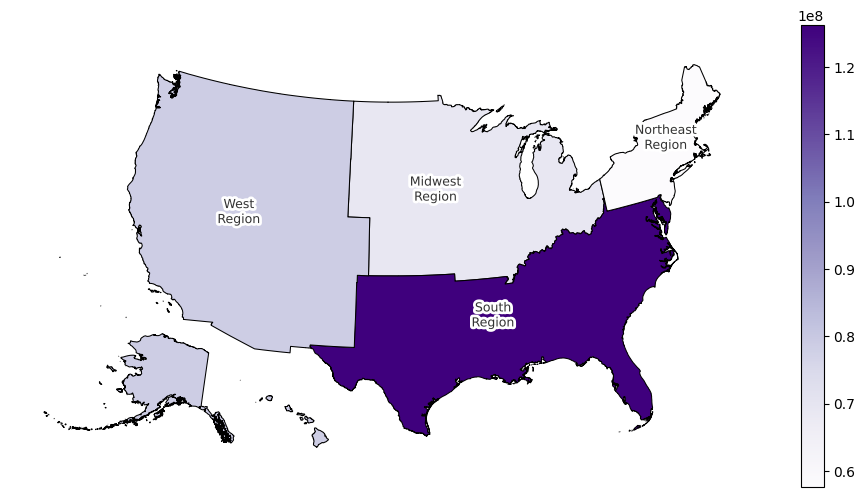

In [15]:
ax = cem.plot_us(
    gdf_regions,
    VARIABLE_TOTAL_POPULATION,
    legend=True,
    linewidth=0.75, 
    geo_label=gdf_regions["NAME"].str.replace(' ', '\n'),
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

In [16]:
gdf_regions[VARIABLE_TOTAL_POPULATION].sum()

331449281

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### All Divisions

In [17]:
gdf_divisions = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],
    
    # All the divisions
    division="*",
    
    with_geometry=True  
)

In [18]:
gdf_divisions

,DIVISION,NAME,P1_001N,geometry
0,1,New England Division,15116205,"MULTIPOLYGON (((-67.76649 44.53099, -67.76292 ..."
1,2,Middle Atlantic Division,42492943,"MULTIPOLYGON (((-72.03769 41.25128, -72.03472 ..."
2,3,East North Central Division,47368533,"MULTIPOLYGON (((-82.73447 41.60351, -82.72425 ..."
3,4,West North Central Division,21616921,"MULTIPOLYGON (((-89.59206 47.96668, -89.59147 ..."
4,5,South Atlantic Division,66089734,"MULTIPOLYGON (((-75.56752 39.51020, -75.56477 ..."
5,6,East South Central Division,19402234,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
6,7,West South Central Division,40774139,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
7,8,Mountain Division,24919150,"POLYGON ((-120.00645 39.27288, -120.00643 39.2..."
8,9,Pacific Division,53669422,"MULTIPOLYGON (((-133.55208 56.43024, -133.5476..."


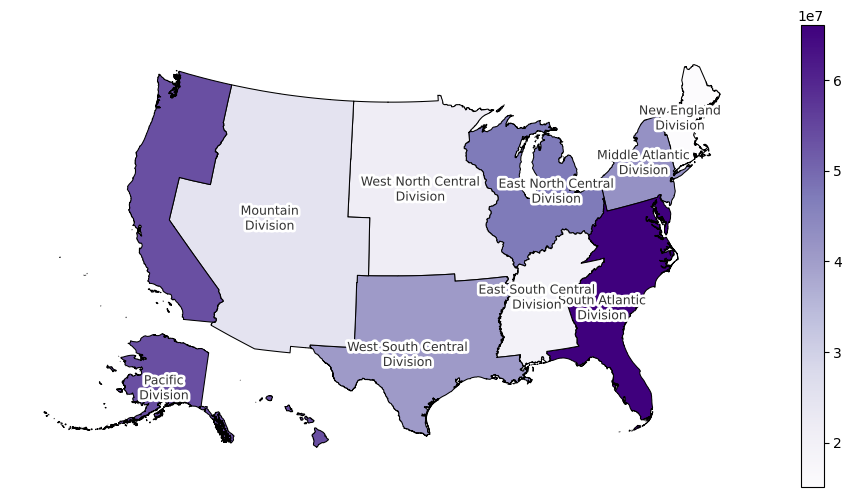

In [19]:
ax = cem.plot_us(
    gdf_divisions,
    VARIABLE_TOTAL_POPULATION,
    legend=True,
    linewidth=0.75, 
    geo_label=gdf_divisions["NAME"].str.replace(' Division', '\nDivision'),
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

In [20]:
gdf_divisions[gdf_divisions['DIVISION'].isin(("1", "2"))][VARIABLE_TOTAL_POPULATION].sum()

57609148

In [21]:
gdf_divisions[VARIABLE_TOTAL_POPULATION].sum()

331449281

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### States

This takes us back to the state geometries we had in the median rent query.

In [22]:
gdf_states = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],

    # All the states
    state="*",
    
    with_geometry=True  
)

In [23]:
gdf_states.head()

,STATE,NAME,P1_001N,geometry
0,42,Pennsylvania,13002700,"POLYGON ((-80.51989 40.90666, -80.51963 40.911..."
1,06,California,39538223,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
2,54,West Virginia,1793716,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
3,49,Utah,3271616,"POLYGON ((-114.05296 37.59278, -114.05247 37.6..."
4,36,New York,20201249,"MULTIPOLYGON (((-79.76215 42.24305, -79.76196 ..."


In [24]:
gdf_states[VARIABLE_TOTAL_POPULATION].sum()

334735155

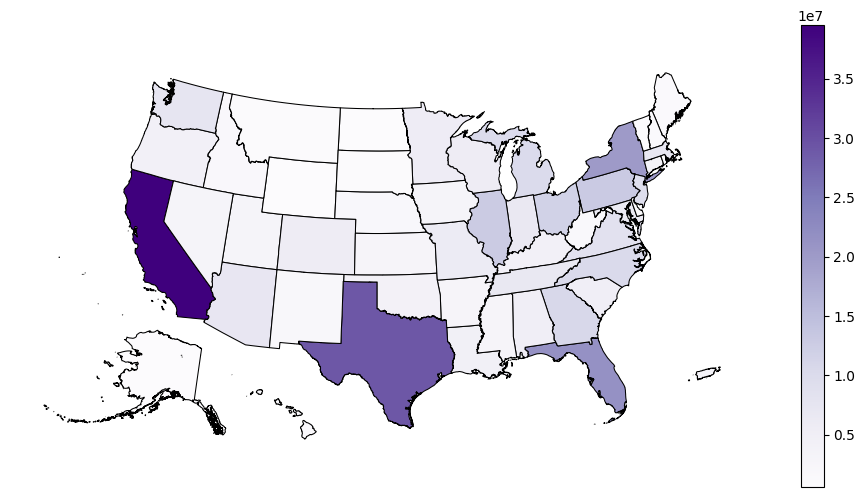

In [25]:
ax = cem.plot_us(
    gdf_states,
    VARIABLE_TOTAL_POPULATION,
    legend=True,
    linewidth=0.75, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

In [26]:
gdf_states[gdf_states['STATE'].isin(states.ALL_STATES_AND_DC)][VARIABLE_TOTAL_POPULATION].sum()

331449281

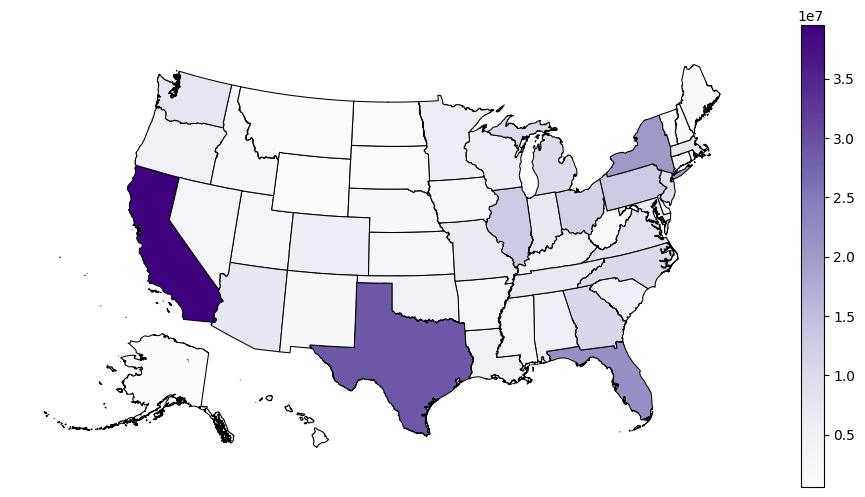

In [27]:
ax = cem.plot_us(
    gdf_states[gdf_states['STATE'].isin(states.ALL_STATES_AND_DC)],
    VARIABLE_TOTAL_POPULATION,
    legend=True,
    linewidth=0.75, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Within a State

For the next series of examples, we will go back to the ACS5 dataset and we
will query and plot median household income at several different levels of
geography.

In [28]:
VARIABLE_MEDIAN_HOUSEHOLD_INCOME = 'B19013_001E'

gdf_md = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # Just Maryland
    state=states.MD,
    
    with_geometry=True  
)

In [29]:
gdf_md

,STATE,NAME,B19013_001E,geometry
0,24,Maryland,98461,"MULTIPOLYGON (((-76.04998 37.99011, -76.04865 ..."


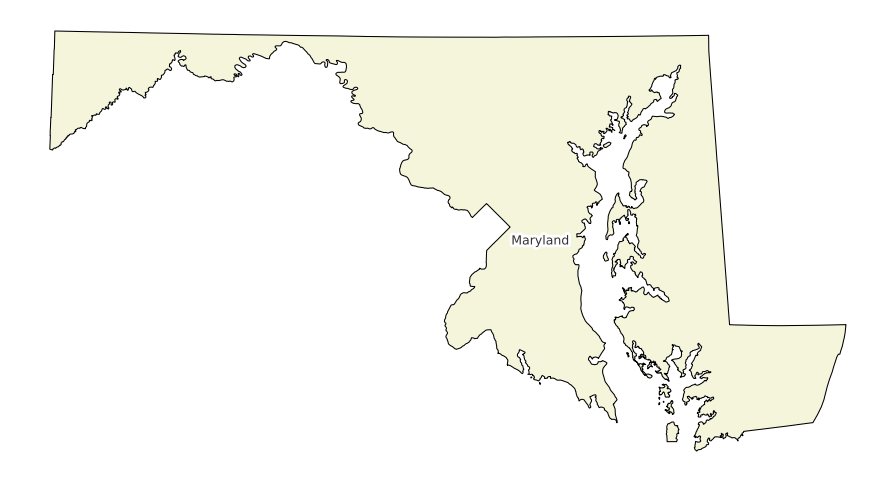

In [30]:
ax = cem.plot_map(
    gdf_md,
    linewidth=0.75, 
    geo_label=gdf_md["NAME"].str.replace(' ', '\n'),
    color='beige', 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Counties

In [31]:
gdf_md_counties = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # All Counties in Maryland. Notice how we use
    # two different arguments.
    state=states.MD,
    county='*',
    
    with_geometry=True  
)

In [32]:
gdf_md_counties

,STATE,COUNTY,NAME,B19013_001E,geometry
0,24,001,"Allegany County, Maryland",55248,"POLYGON ((-79.06756 39.47944, -79.06003 39.492..."
1,24,003,"Anne Arundel County, Maryland",116009,"POLYGON ((-76.83849 39.10421, -76.83047 39.106..."
2,24,005,"Baltimore County, Maryland",88157,"MULTIPOLYGON (((-76.32570 39.31397, -76.32452 ..."
3,24,009,"Calvert County, Maryland",128078,"POLYGON ((-76.70121 38.71276, -76.69915 38.715..."
4,24,011,"Caroline County, Maryland",65326,"POLYGON ((-76.01505 38.72869, -76.01321 38.733..."
5,24,013,"Carroll County, Maryland",111672,"POLYGON ((-77.31116 39.63973, -77.30717 39.641..."
6,24,015,"Cecil County, Maryland",86869,"POLYGON ((-76.23326 39.72131, -76.15435 39.721..."
7,24,017,"Charles County, Maryland",116882,"POLYGON ((-77.27240 38.48994, -77.26986 38.492..."
8,24,019,"Dorchester County, Maryland",57490,"MULTIPOLYGON (((-76.06544 38.12980, -76.06461 ..."
9,24,021,"Frederick County, Maryland",115724,"POLYGON ((-77.67716 39.32453, -77.67637 39.330..."


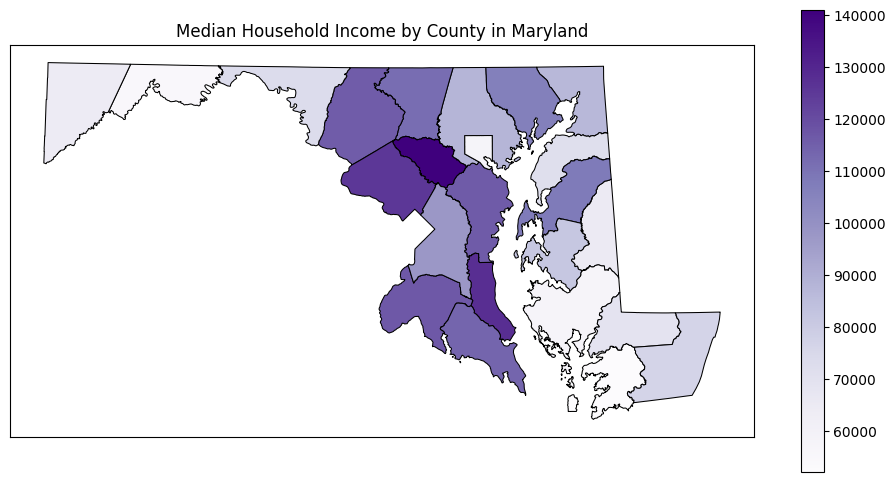

In [33]:
ax = cem.plot_map(
    gdf_md_counties,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    legend=True,
    linewidth=0.75, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)

_ = ax.set_title("Median Household Income by County in Maryland")

### Census Tracts in Maryland

In [34]:
gdf_md_tracts = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # All tracts in all counties in Maryland. 
    # We now use three arguments.
    state=states.MD,
    county='*',
    tract='*',
    
    with_geometry=True  
)

In [35]:
gdf_md_tracts.head()

,STATE,COUNTY,TRACT,NAME,B19013_001E,geometry
0,24,001,000100,Census Tract 1; Allegany County; Maryland,56232.0,"POLYGON ((-78.66654 39.64906, -78.66520 39.651..."
1,24,001,000200,Census Tract 2; Allegany County; Maryland,66596.0,"POLYGON ((-78.77810 39.60210, -78.77686 39.604..."
2,24,001,000500,Census Tract 5; Allegany County; Maryland,47781.0,"POLYGON ((-78.75836 39.65248, -78.75665 39.654..."
3,24,001,000600,Census Tract 6; Allegany County; Maryland,48607.0,"POLYGON ((-78.76192 39.64337, -78.75821 39.648..."
4,24,001,000700,Census Tract 7; Allegany County; Maryland,36090.0,"POLYGON ((-78.76509 39.63262, -78.76310 39.635..."


Text(0.5, 1.0, 'Median Household Income by Census Tract in Maryland')

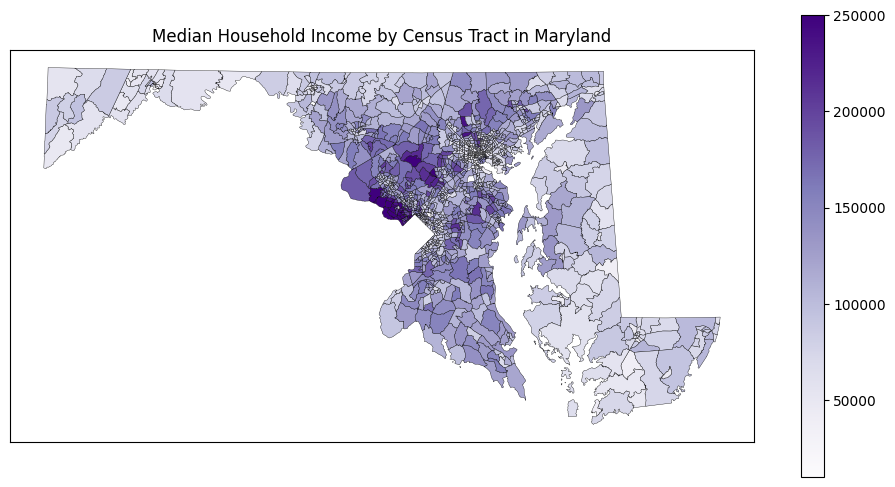

In [36]:
ax = cem.plot_map(
    gdf_md_tracts,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    legend=True,
    linewidth=0.25, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)

ax.set_title("Median Household Income by Census Tract in Maryland")

### Census Tracts in Prince George's County, Maryland

In [37]:
import censusdis.counties.maryland as md_counties

gdf_prince_georges_md_tracts = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # All tracts in all counties in Maryland. 
    # We now use three arguments.
    state=states.MD,
    county=md_counties.PRINCE_GEORGES,
    tract='*',
    
    with_geometry=True  
)

In [38]:
gdf_prince_georges_md_tracts.head()

,STATE,COUNTY,TRACT,NAME,B19013_001E,geometry
0,24,033,800102,Census Tract 8001.02; Prince George's County; ...,71477,"POLYGON ((-76.86658 39.10759, -76.86454 39.108..."
1,24,033,800103,Census Tract 8001.03; Prince George's County; ...,78536,"POLYGON ((-76.85305 39.10030, -76.84898 39.104..."
2,24,033,800105,Census Tract 8001.05; Prince George's County; ...,93779,"POLYGON ((-76.88941 39.10159, -76.88935 39.101..."
3,24,033,800106,Census Tract 8001.06; Prince George's County; ...,112330,"POLYGON ((-76.89385 39.08965, -76.89221 39.092..."
4,24,033,800108,Census Tract 8001.08; Prince George's County; ...,80550,"POLYGON ((-76.86995 39.09673, -76.86740 39.096..."


Text(0.5, 1.0, "Median Household Income by Census Tract in Prince George's County Maryland")

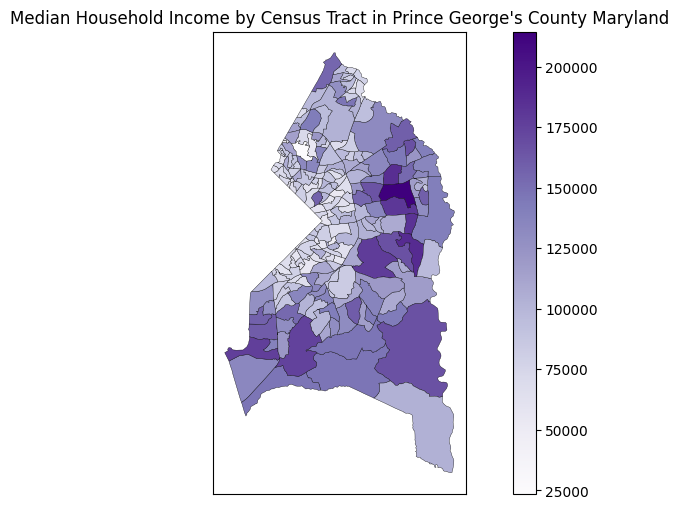

In [42]:
ax = cem.plot_map(
    gdf_prince_georges_md_tracts,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    legend=True,
    linewidth=0.25, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)

ax.set_title("Median Household Income by Census Tract in Prince George's County Maryland")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Off-Spine Geography (And our first foray into metadata)

- *State - County - Tract - Block Group*, are referred to as *on-spine* geographies
- Not all geographies nest and cover all areas like on-spine geographies do.
- Those that don't are called *off-spine* geographies.
- We can query all available nested geometries, on and off-spine.
- All are valid combinations of geography kwargs.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<img src="./images/census_geos.png" alt="Census Geographies">

More details at https://www.census.gov/content/dam/Census/data/developers/geoareaconcepts.pdf.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Query for geographies available for a dataset

Each element is a list that tells us a valid combination
of geography `kwargs`.

In [40]:
list(ced.geographies(ACS5, 2022))

[['us'],
 ['region'],
 ['division'],
 ['state'],
 ['state', 'county'],
 ['state', 'county', 'county_subdivision'],
 ['state', 'county', 'county_subdivision', 'subminor_civil_division'],
 ['state', 'county', 'county_subdivision', 'place_remainder_or_part'],
 ['state', 'county', 'tract'],
 ['state', 'county', 'tract', 'block_group'],
 ['state', 'place', 'county_or_part'],
 ['state', 'place'],
 ['state', 'consolidated_city'],
 ['state', 'consolidated_city', 'place_or_part'],
 ['state', 'alaska_native_regional_corporation'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_subdivision_remainder'],
 ['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only'],
 ['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_census_tract'],
 ['american_indian_area_alaska_native_area_hawaiian_home

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Places in New Jersey

- `['state', 'place']` was one of the entries in the list above. 
- It tells us that `state=` and `place=` are 
valid keywords to describe a geography.
- We will use them in the query below.
- Places are off-spine, so
  - Places do not cover the entire area of the state the way on-spine geometries do.
  - Every part of the state is in a county, a census tract, and a block group.
  - Not every part of the state is in a place.

In [41]:
gdf_nj_places = ced.download(
    'acs/acs5',
    2020,
    ['NAME', VARIABLE_MEDIAN_AGE], 
   
    # Query all places in New Jersey.
    state=states.NJ,
    place='*',
    
    with_geometry=True
)

gdf_nj_places.head()

NameError: name 'VARIABLE_MEDIAN_AGE' is not defined

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot places

In [ ]:
# Plot the whole state in a background color.
gdf_nj_state = gdf_states[gdf_states['STATE']==states.NJ]

ax = cem.plot_map(
    gdf_nj_state, linewidth=0.75, color='beige', edgecolor='#333', figsize=(12, 6)
)

# Plot the places on top.
ax = cem.plot_map(
    gdf_nj_places,
    VARIABLE_MEDIAN_AGE,

    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
            
    figsize=(12, 6),
    legend=True,
    
    ax=ax
)

_ = ax.set_title("Median Household Income by Place in New Jersey")

#### Or if you prefer a background map

In [ ]:
ax = cem.plot_map(
    gdf_nj_places,
    VARIABLE_MEDIAN_AGE,
    
    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
    
    figsize=(12, 6),
    legend=True,
    
    # Add a background map from Open Street Maps
    with_background=True
)

_ = ax.set_title("Median Household Income by Place in New Jersey")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Query Core Based Statistical Areas (CBSAs) in the United States

- Metropolitan (population 50,000+) and Micropolitan (population 10,000-50,000) areas are collectively know as [Core Based Statistical Areas](https://en.wikipedia.org/wiki/Core-based_statistical_area) (CBSAs)
- Our list of geographies included `['metropolitan_statistical_area_micropolitan_statistical_area']`
- Note that this was standalone, not nested in a state like `place` was.
- CBSAs represent greater micro/metropolitan areas
- They may cross state lines

In [ ]:
gdf_cbsa = ced.download(
    dataset=ACS5,
    vintage=2020,
    
    # Note: 'B03002_001E' is the variable for total population.
    download_variables=['NAME', VARIABLE_MEDIAN_AGE, 'B03002_001E'], 
   
    # Query all CBSAs in the country.
    metropolitan_statistical_area_micropolitan_statistical_area='*',
    
    with_geometry=True
)

In [ ]:
# We want the n largest CBSAs by population.
n = 100
gdf_large_cbsa = gdf_cbsa.nlargest(n, 'B03002_001E')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the Largest CBSAs

In [ ]:
ax = cem.plot_us(
    gdf_states,
    color='#f7f7f7',
    edgecolor='darkgrey',
    figsize=(12,6)
)

ax = cem.plot_us(
    gdf_large_cbsa,
    VARIABLE_MEDIAN_AGE,
    
    cmap='Spectral',
    edgecolor='#333',
    linewidth=0.5,
        
    legend=True,
    
    ax=ax
)

ax.axis('off')
_ = ax.set_title(f'Median Age in the {n} Most Populous CBSAs in the United States')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Putting On and Off-Spine Geometries Together

<img src="./images/census_geos_place_tract.png" alt="Path to Census Geographies Place and Tract">

This can be inconvenient if we want, for example, 
all tracts in a place.

### Example: All census tracts in Baltimore, MD

### Option I: Do it manually (hint: this is the hard way)

1. Query all tracts in Maryland, with geometry;
2. Query the geometry of Baltimore;
3. See which tracts are within Baltimore.

In [ ]:
# Step 1: All tracts in Massachusetts.

gdf_md_tracts = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME", "B09001_001E"],

    # These are the geometries we want data for, but only for the ones contained
    # in the outer geometry.
    state=states.MA,
    county="*",
    tract="*",

    with_geometry=True,
)

In [ ]:
# Step 2: Boston
from censusdis.places.connecticut import HARTFORD_CITY
from censusdis.places.virginia import RICHMOND_CITY
from censusdis.places.delaware import WILMINGTON_CITY
from censusdis.places.massachusetts import BOSTON_CITY

gdf_baltimore_geo = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],

    state=states.MA,
    place=BOSTON_CITY,

    with_geometry=True
)

In [ ]:
# Visual verification

gdf_md_tracts['B09001_001E'].min()

In [ ]:
ax = cem.plot_map(
    gdf_md_tracts,

    'B09001_001E',

    cmap='Reds',
    edgecolor='#333',
    linewidth=0.25,

    legend=True,
    
    figsize=(12, 8),

    # with_background=True
)

ax = cem.plot_map(
    gdf_baltimore_geo.boundary,
    
    color='blue',
    linewidth=2.0,

    # Plot on top of the Maryland tracts.
    ax=ax,
    zorder=10,
)

_ = ax.set_title("Massachusetts Census Tracts and Boston Boundaries")

In [ ]:
import censusdis.counties.massachusetts as ma_counties

gdf_suffolk_county_tracts = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME", "B09001_001E"],

    # These are the geometries we want data for, but only for the ones contained
    # in the outer geometry.
    state=states.MA,
    county=ma_counties.SUFFOLK,
    tract="*",

    with_geometry=True,
)

In [ ]:
ax = cem.plot_map(
    gdf_suffolk_county_tracts,

    'B09001_001E',

    cmap='Reds',
    edgecolor='#333',
    linewidth=0.25,

    legend=True,
    
    with_background=True,
    
    figsize=(12, 8)
)

ax = cem.plot_map(
    gdf_baltimore_geo.boundary,
    
    color='blue',
    linewidth=2.0,

    # Plot on top of the Maryland tracts.
    ax=ax,
    zorder=10,
)

_ = ax.set_title("Massachusetts Census Tracts and Boston Boundaries")

In [ ]:
gdf_baltimore_tracts_sjoin = gdf_md_tracts.sjoin(
    gdf_baltimore_geo,
)

In [ ]:
ax = cem.plot_map(
    gdf_baltimore_tracts_sjoin,
    'B09001_001E',

    cmap='Reds',
    edgecolor='#333',
    linewidth=0.5,
        
    legend=True,
    
    with_background=True,
    
    figsize=(12, 8)
)

ax = cem.plot_map(
    gdf_baltimore_geo.boundary,
    
    color='blue',
    linewidth=2.0,

    # Plot on top of the Maryland tracts.
    ax=ax,
    zorder=10,
)

_ = ax.set_title("Massachusetts Census Tracts that Intersect the City of Boston")

In [ ]:
gdf_baltimore_tracts_contained = gdf_md_tracts.sjoin(
    gdf_baltimore_geo,
    # This is the predicate we forgot:
    predicate='within',
)

In [ ]:
ax = cem.plot_map(
    gdf_baltimore_tracts_contained,
    'B09001_001E',

    cmap='Reds',
    edgecolor='#333',
    linewidth=0.5,

    legend=True,
    
    with_background=True,
    
    figsize=(12, 8)
)

ax = cem.plot_map(
    gdf_baltimore_geo.boundary,
    
    color='blue',
    linewidth=2.0,

    ax=ax,
    zorder=10,
)

_ = ax.set_title("Massachusetts Census Tracts Contained Within the City of Boston")

### Option II: The Easy Way - Let `ced.contained_within` do the work

In [ ]:
gdf_baltimore_tracts = ced.contained_within(
    # This is the outer geometry that we want all of our results to be within.
    state=states.MA,
    place=BOSTON_CITY
).download(
    # This looks like the arguments to an ordinary `ced.download`
    # but the results will be restricted to those contained within
    # Baltimore City.
    dataset=ACS5,
    vintage=2022,
    download_variables=["NAME", "B09001_001E"],

    # These are the geometries we want data for, but only for the ones contained
    # in the outer geometry.
    state="*",
    county="*",
    tract="*",

    with_geometry=True,

    remove_water=True,
)

In [ ]:
ax = cem.plot_map(
    gdf_baltimore_tracts,

    'B09001_001E',

    cmap='Reds',
    edgecolor='#333',
    linewidth=0.5,
    
    legend=True,
    
    with_background=True,
    
    figsize=(12, 8)
)

ax = cem.plot_map(
    gdf_baltimore_geo.boundary,
    
    color='blue',
    linewidth=2.0,

    ax=ax,
    zorder=10,
)

# The U.S. Census Data Model in Detail

# Discovering Variables - More Metadata

Those queries were fun, but 
- how did we know `acs/acs5` was the name of the ACS 5 data set?
- how did we know that median household income was represented by the variable, `'B19013_001E'`? 
- how do we explore groups and individual variables to find variables that might interest us?

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Discovering all the Datasets

In [ ]:
df_datasets = ced.variables.all_data_sets()
df_datasets

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Find ACS 5

In [ ]:
df_datasets[df_datasets['TITLE'].str.contains('American Community Survey: 5-Year')].head()

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## All the Groups of Variables in a Data Set for a Given Vintage

In [ ]:
df_groups = ced.variables.all_groups('acs/acs5', 2020)

df_groups

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Remember dec/pl had more geometries?

- What about groups of variables? 
  - It has a lot less.

In [ ]:
df_groups_dec_pl = ced.variables.all_groups('dec/pl', 2020)

df_groups_dec_pl

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Finding Interesting Groups

In [ ]:
df_groups[df_groups['DESCRIPTION'].str.contains('MEDIAN HOUSEHOLD INCOME')]

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Variables in a Group

This particular group has only one variable.

In [ ]:
ced.variables.all_variables('acs/acs5', 2020, 'B19013')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## A Group with Several Variables

In [ ]:
ced.variables.all_variables('acs/acs5', 2020, 'B25119')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Variables in a Group as a Tree

In many groups, 

- variables and their values are aggregated in a tree
- the tree is implicitly encoded as root-to-note paths in each variable's label
  - Uses `!!` and `:`  
- `ced.variables.group_tree` can query the structure of the tree
  - Labels are parsed for us

In [ ]:
ced.variables.group_tree('acs/acs5', 2020, "B25119")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Deeper Trees

Here is an example of a group that has a tree of variables that is 
three to four levels deep, not just two.

In [ ]:
ced.variables.group_tree('dec/pl', 2020, 'P2')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Get a List of Leaves

In [ ]:
ced.variables.group_leaves('acs/acs5', 2020, "B25119")

In [ ]:
ced.variables.group_leaves('dec/pl', 2020, 'P2')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query All Variables in a Group

In [ ]:
df_west_coast_income_by_tenure = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    
    # Only one explicitly specified variable.
    download_variables=['NAME'],  
    
    # Get all the variables that are in this group
    group="B25119",
    
    state=[states.WA, states.OR, states.CA]
)

df_west_coast_income_by_tenure

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query Just the Leaves of a Group

In [ ]:
df_west_coast_income_by_tenure_leaves = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    
    # Only one explicitly specified variable.
    download_variables=['NAME'],  
    
    # Get all the variables that are in this group
    leaves_of_group="B25119",
    
    state=[states.WA, states.OR, states.CA]
)

df_west_coast_income_by_tenure_leaves

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Leaves of a larger tree of variables

This is an example of the kind of case where `leaves_of_group=` 
is really useful. It allows us to get a count of every racial
and ethnic group without any of the intermediate aggregations.

In [ ]:
df_west_coast_demographics = ced.download(
    dataset='dec/pl',
    vintage=2020,
    
    # Only one explicitly specified variable.
    download_variables=['NAME'],  
    
    # Get all the variables that are leaves of this group
    leaves_of_group="P2",
    
    state=[states.WA, states.OR, states.CA]
)

In [ ]:
df_west_coast_demographics

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>